### Importing libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing Dataset

In [104]:
df = pd.read_csv("./Dataset/Hotel Reservations.csv")


In [105]:
df.head(5)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Shape of our data

In [106]:
df.shape


(36275, 19)

### Dropping the Booking_ID column as it doesen't going to add weight to predict

In [107]:
df.drop(["Booking_ID","arrival_year", "arrival_date"], inplace=True, axis="columns")


In [108]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


In [109]:
df.shape


(36275, 16)

### Checking for missing values and duplicate values

In [110]:
(df.isnull().sum() / len(df)) * 100


no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_month                           0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [111]:
df.duplicated().sum()


10477

In [112]:
df[df.duplicated()]


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
20,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,10,Online,0,0,0,65.00,0,Canceled
154,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,4,Offline,0,0,0,104.00,0,Not_Canceled
272,2,0,1,2,Meal Plan 2,0,Room_Type 1,161,3,Online,0,0,0,130.00,0,Canceled
301,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,6,Online,0,0,0,130.00,0,Canceled
319,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,8,Online,0,0,0,115.00,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2,Online,0,0,0,1.00,0,Not_Canceled
36264,2,0,0,2,Meal Plan 1,0,Room_Type 4,187,7,Online,0,0,0,105.30,0,Canceled
36267,2,0,1,0,Not Selected,0,Room_Type 1,49,7,Online,0,0,0,93.15,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,11,Offline,0,0,0,110.00,0,Canceled


### Dropping those duplicates

In [113]:
df = df.drop_duplicates()


In [114]:
df.shape


(25798, 16)

In [115]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


### Encoding categorical values

#### Getting categorical values

In [116]:
categorical = []
for feature in list(zip(df.dtypes.index, df.dtypes)):
    if feature[1] == "object":
        categorical.append(feature[0])


In [117]:
print(categorical)


['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [118]:
df = pd.get_dummies(df, columns=categorical[:-1])

In [119]:
df['booking_status'] = df['booking_status'].map({"Not_Canceled": 0, "Canceled": 1})

In [120]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
df.dtypes


no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_month                             int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1             uint8
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 1            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3            uint8
room_type_reserved_Room_Type 4          

### Checking if the dataset is imbalanced

In [122]:
df["booking_status"].value_counts()


0    18376
1     7422
Name: booking_status, dtype: int64

#### Visualizing counts for target column

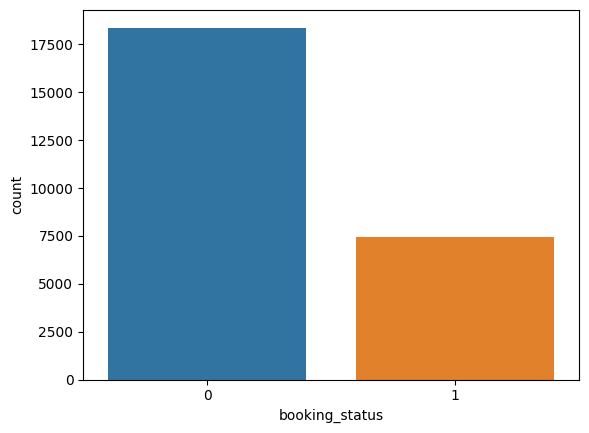

In [123]:
sns.countplot(data=df, x="booking_status")
plt.show()


#### Checking the imbalance ration already we can see it's huge

In [124]:
majority_class_samples = df["booking_status"].loc[df["booking_status"] == 0]
minority_class_samples = df["booking_status"].loc[df["booking_status"] == 1]
Imbalance_Ratio = len(majority_class_samples) / len(minority_class_samples)
print(f"Imbalance Ratio is:{Imbalance_Ratio}")


Imbalance Ratio is:2.4758825114524385


The problem with imbalance is when model will predict the minority will get dominated by the majority. We will ovbiously have to make our dataset balance later.

### Dataset Visualization

#### Histogram

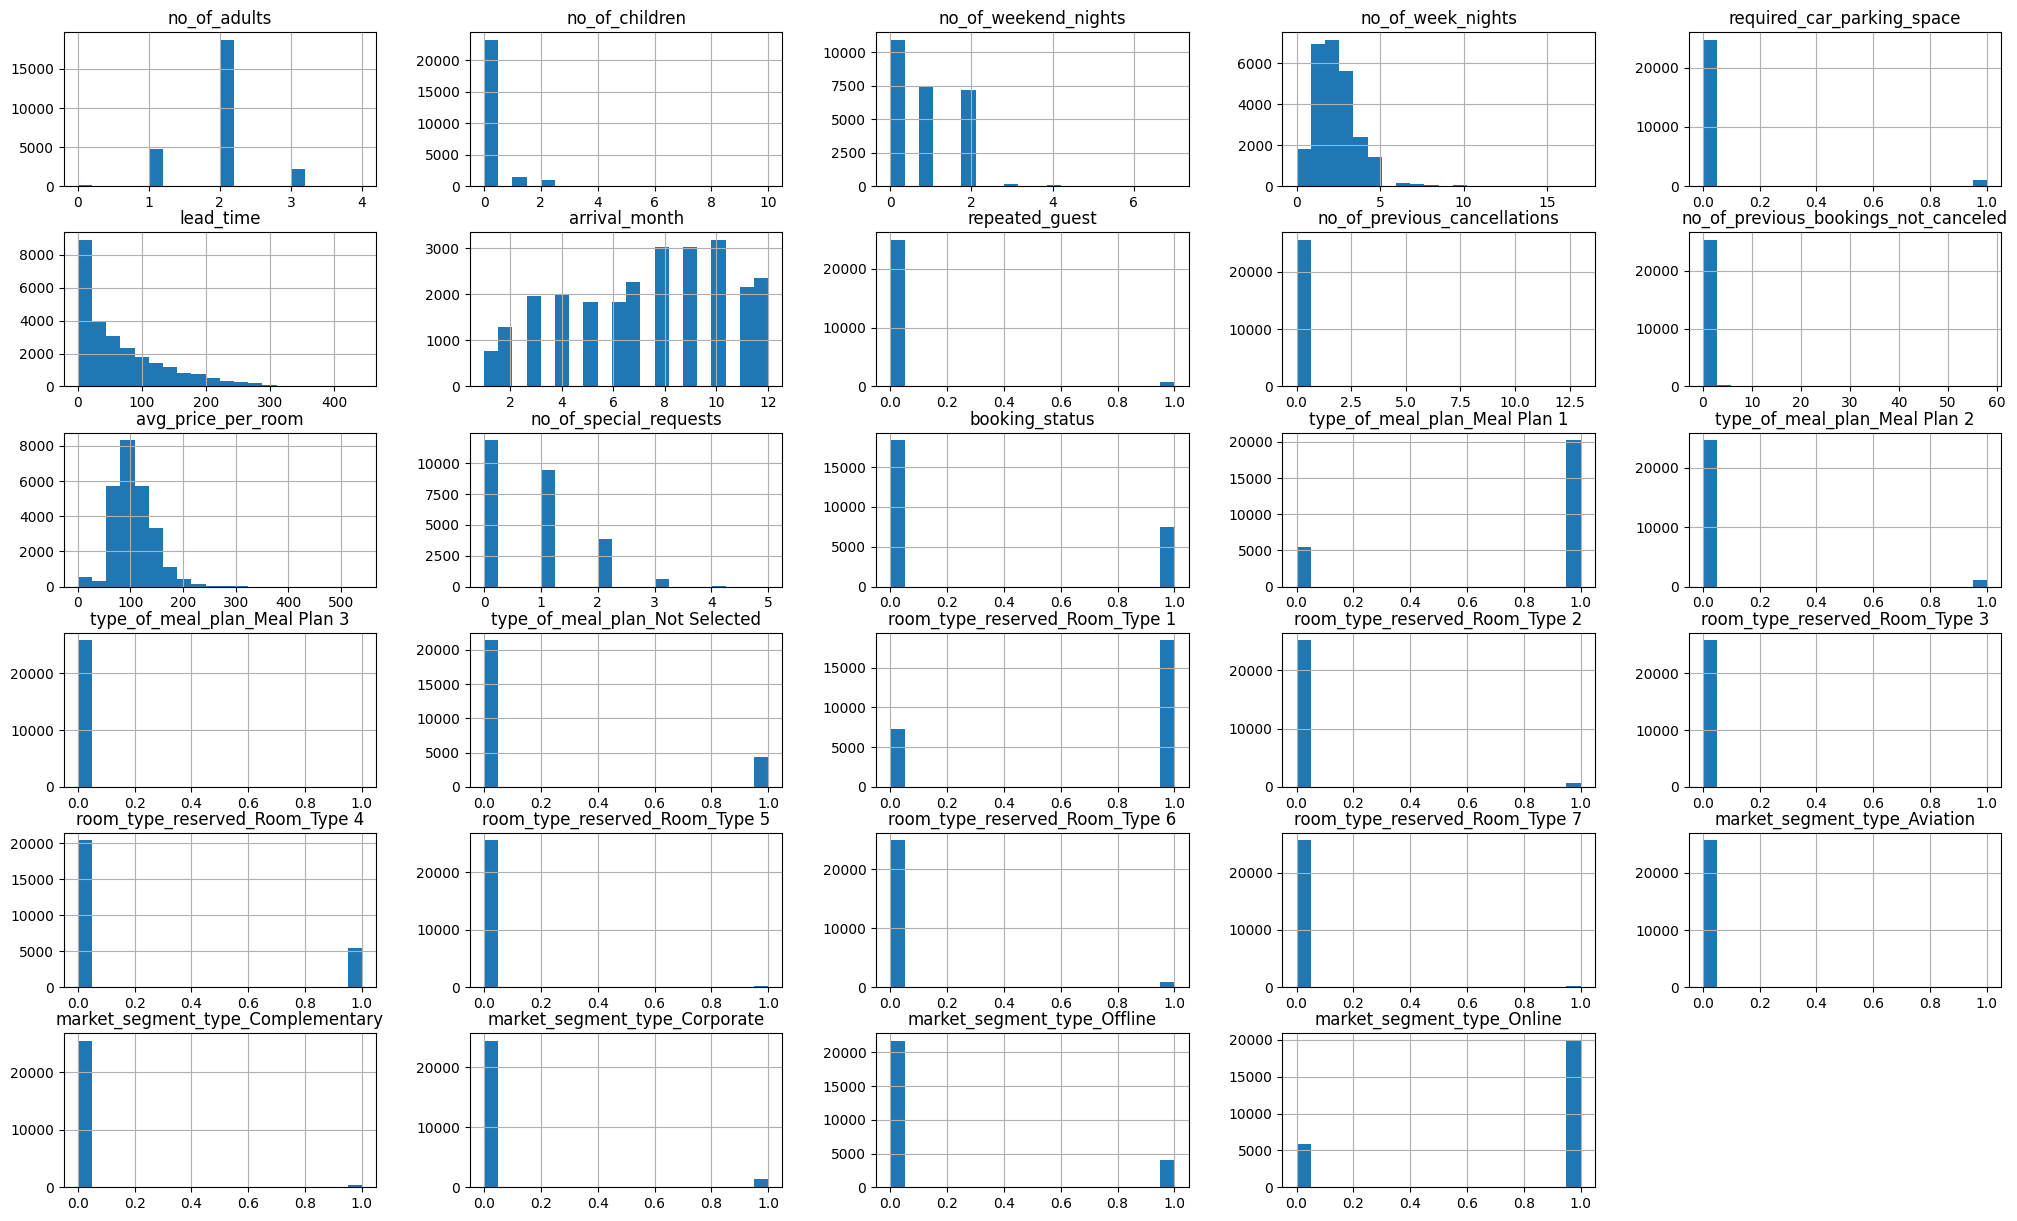

In [125]:
df.hist(figsize=(25,15),bins=20)
plt.show()

#### KDE plot

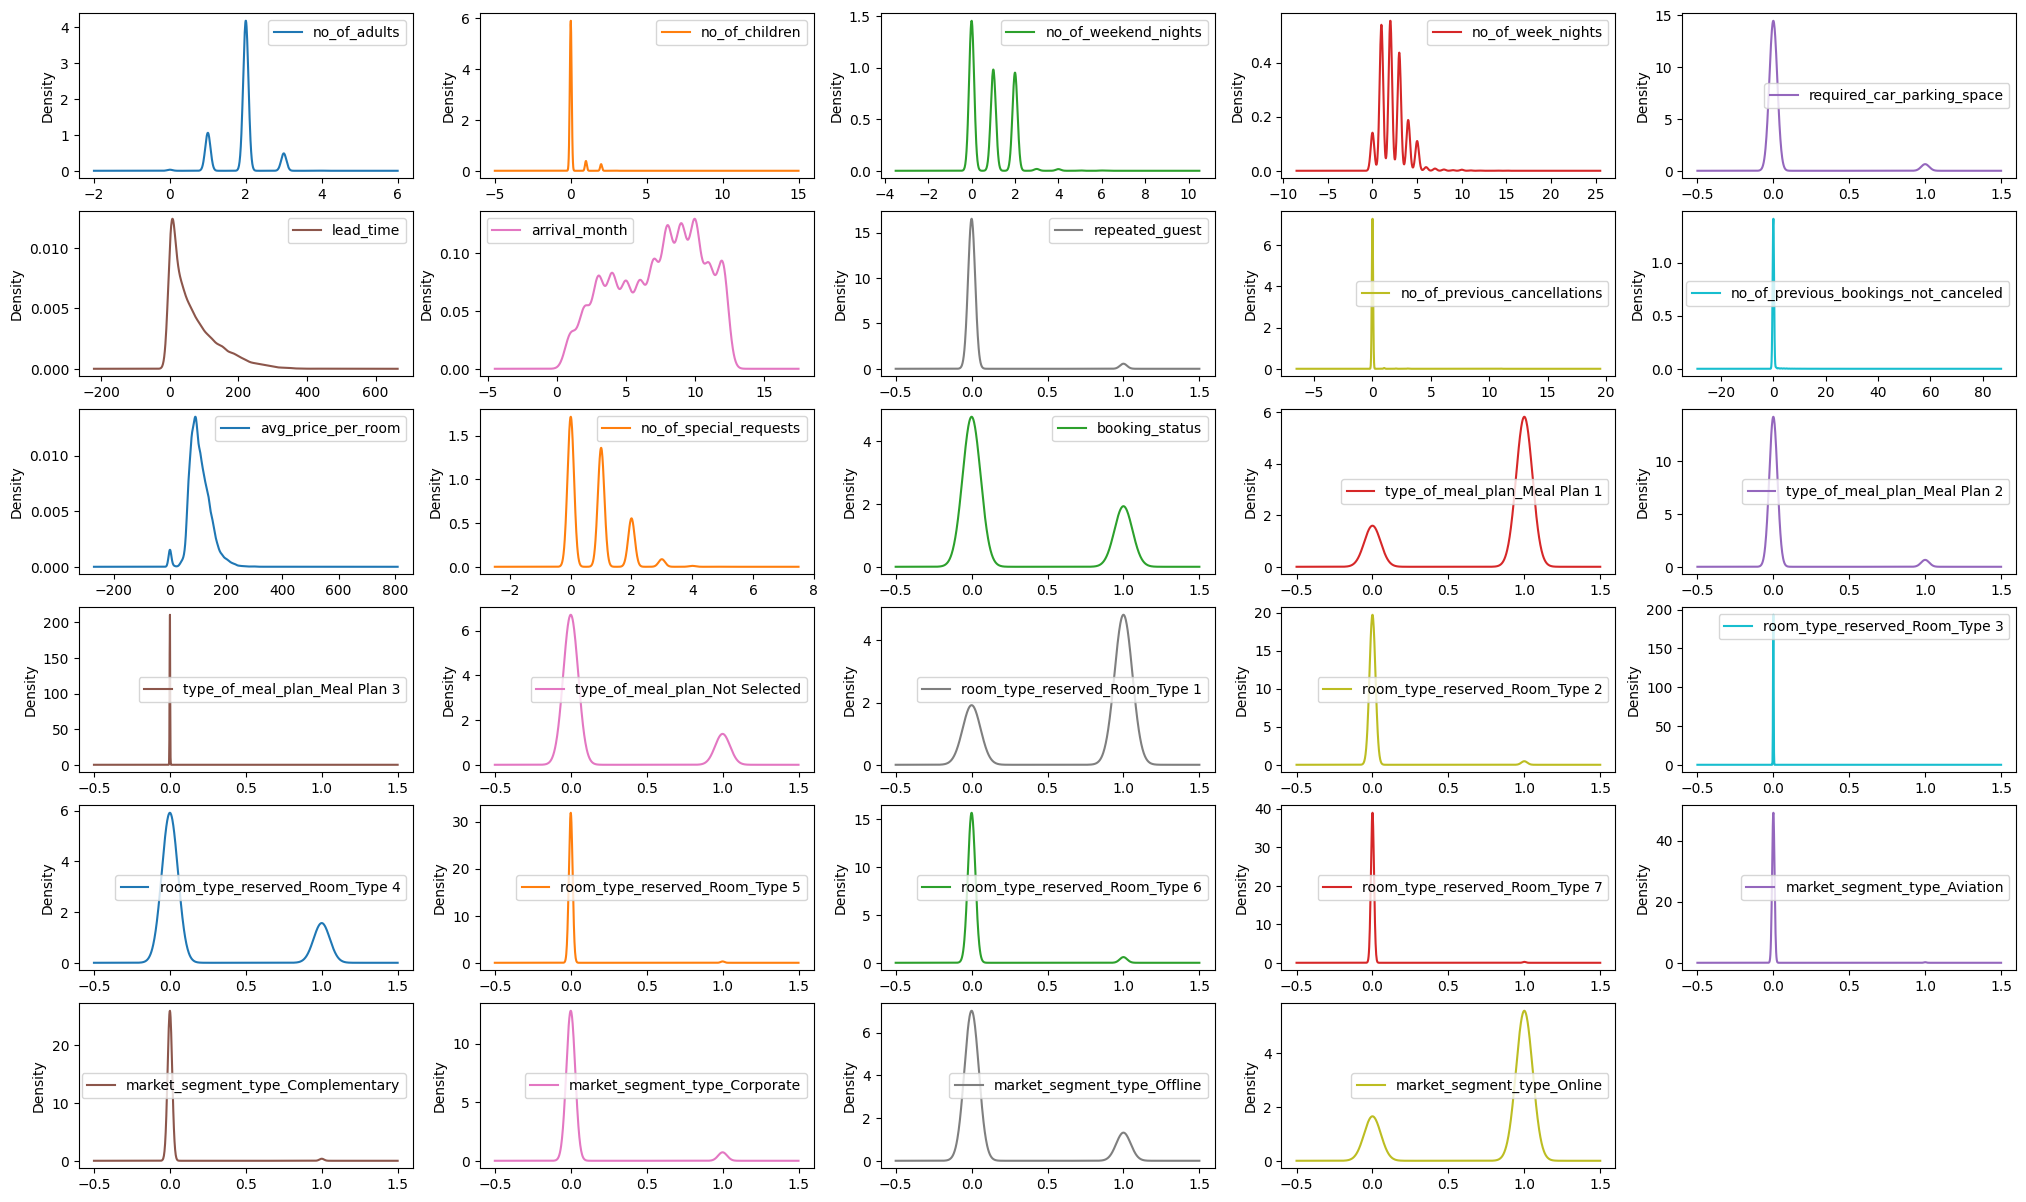

In [126]:
df.plot(kind='density', subplots=True, layout=(6,5),sharex=False,figsize=(25,15))
plt.show()

### Checking for outliers

We will consider removing outliers after train and test split as it will work as remedy for data leakage. I will consider using winsorize method as it will not remove those outlier instead it will replace those outlier values with the percentile range we will define. 

#### Box Plot

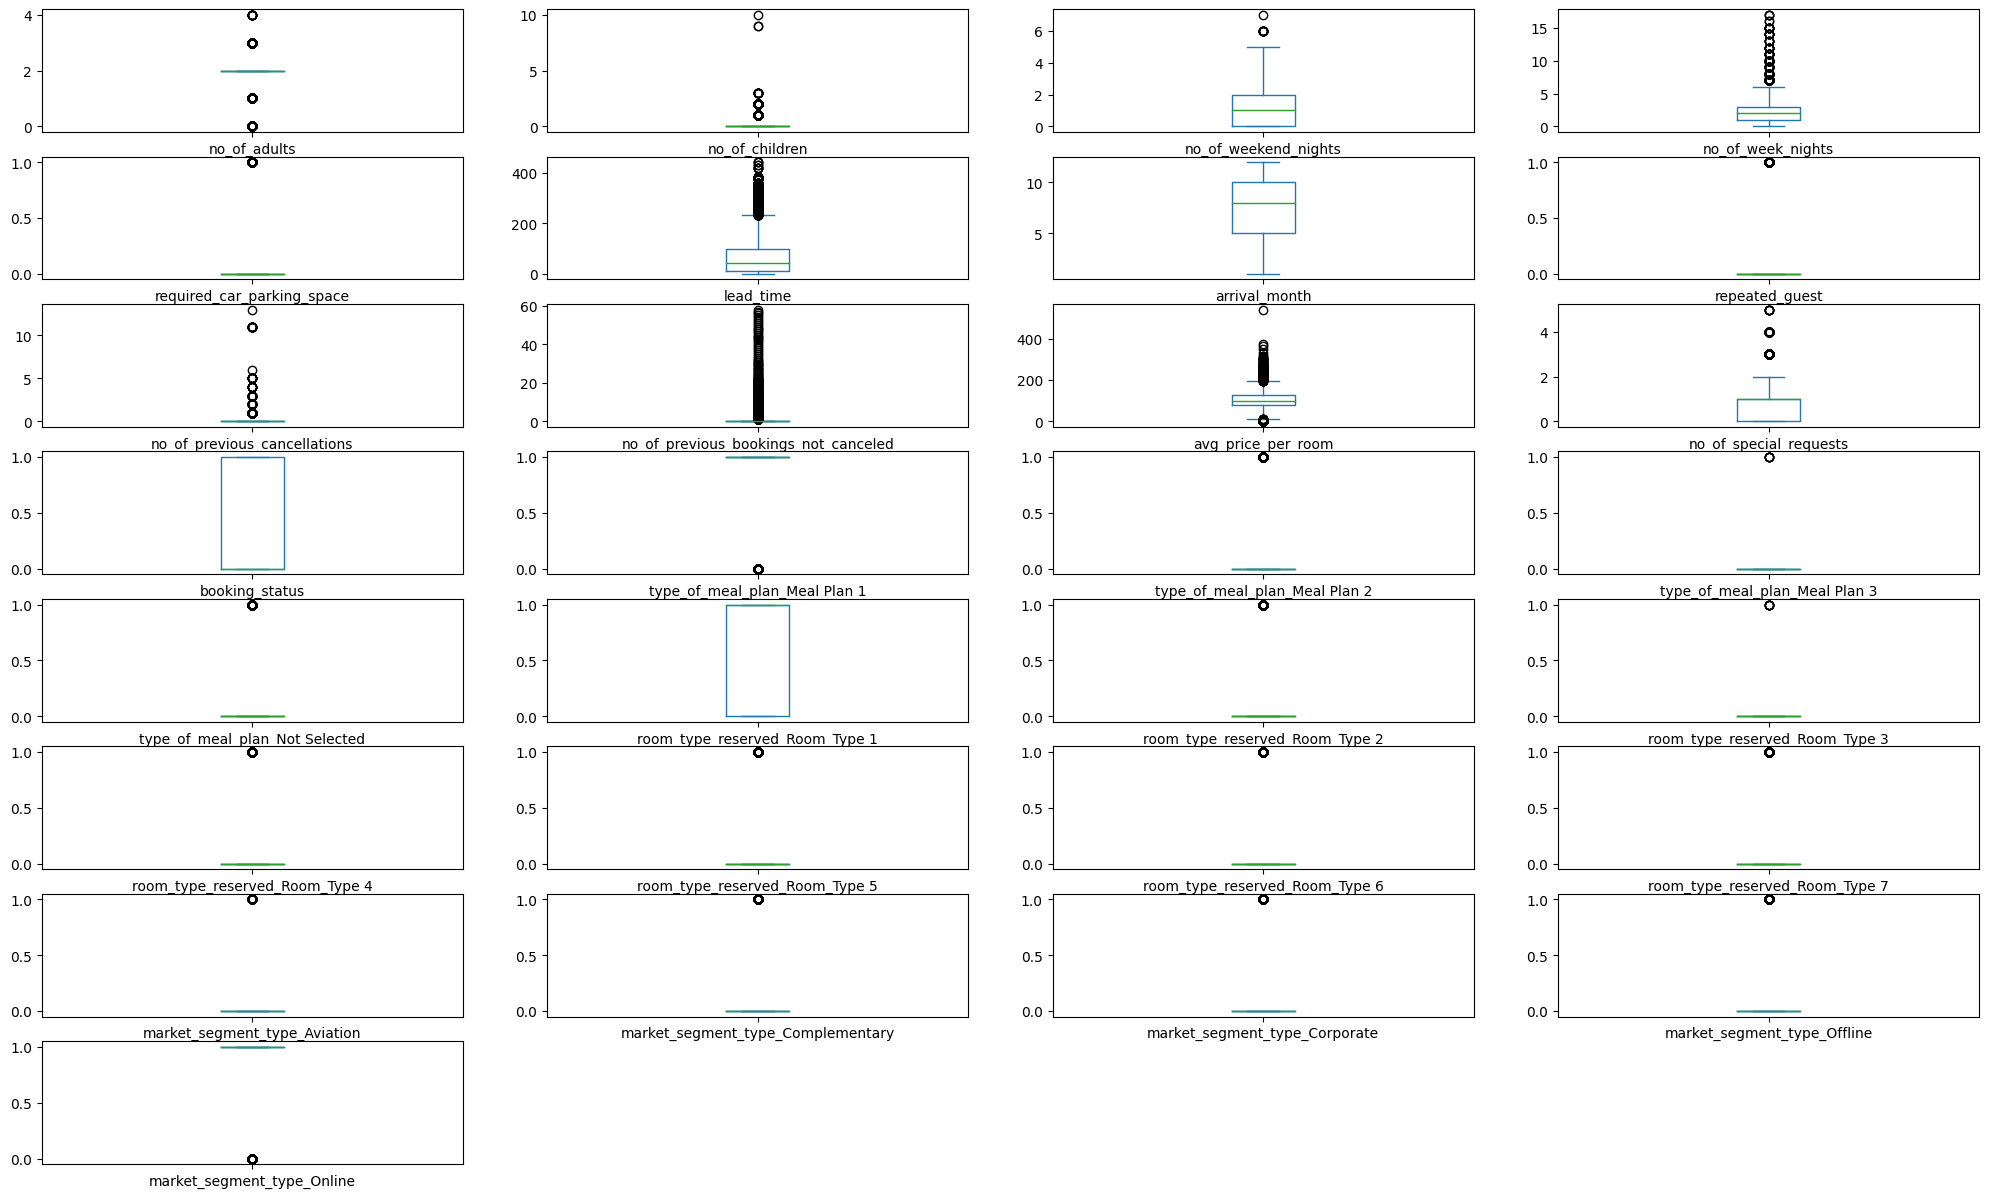

In [127]:
df.plot(
    kind="box",
    subplots=True,
    layout=(8, 4),
    sharey=False,
    sharex=False,
    figsize=(25, 15),
)
plt.show()


### Checking Correlation

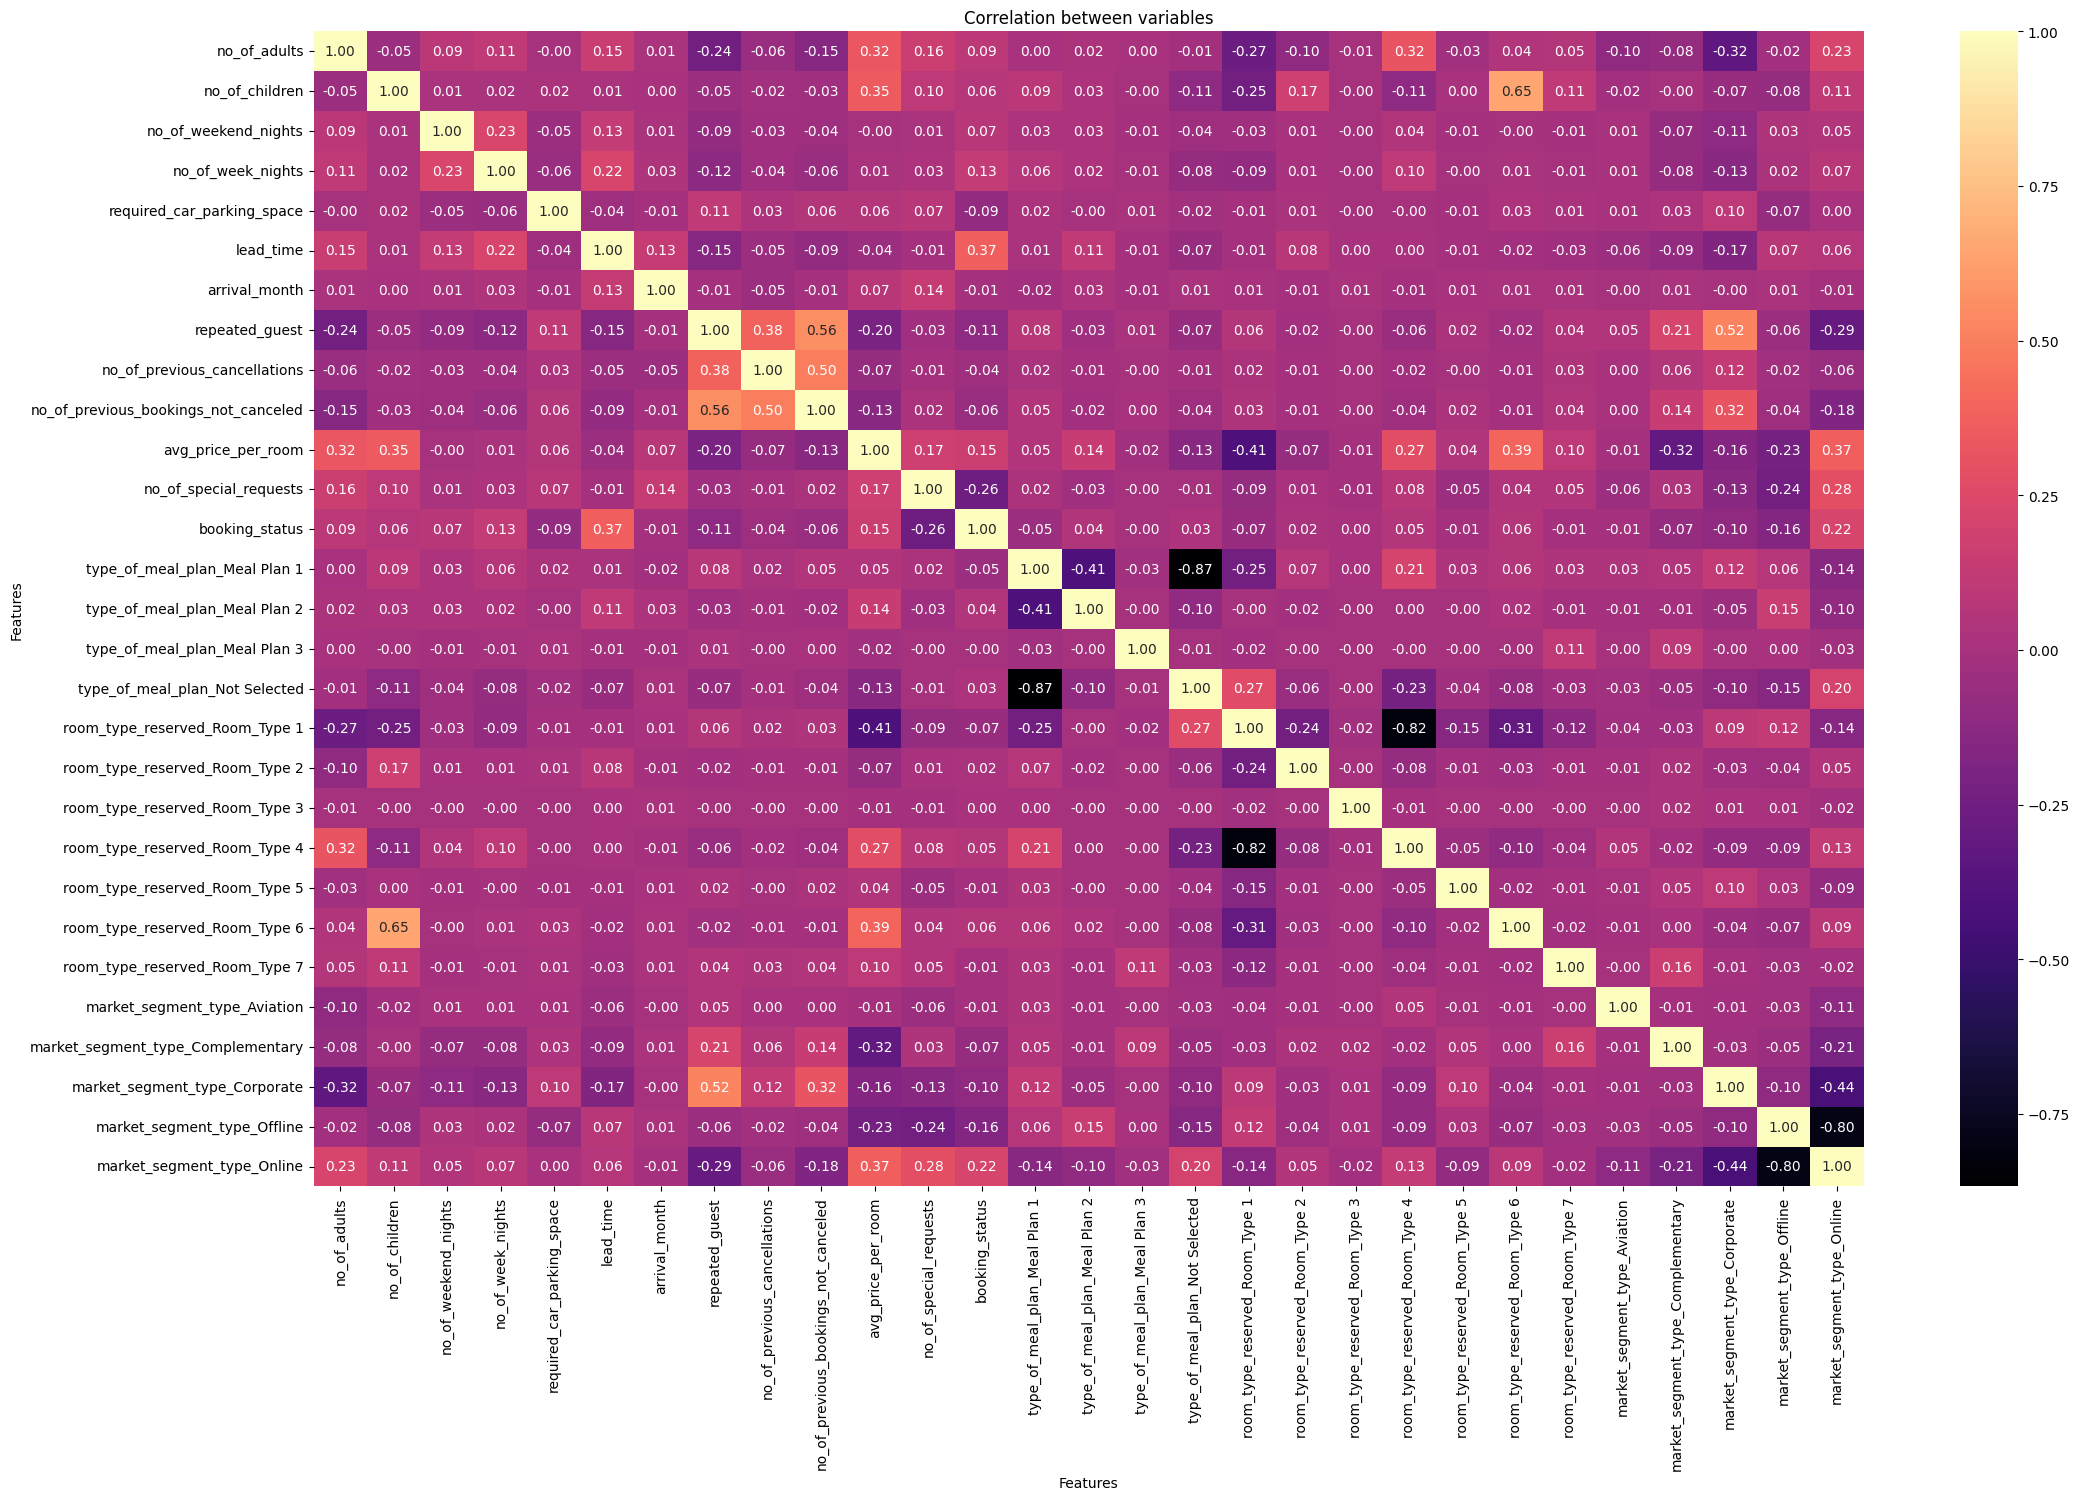

In [128]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma", fmt=".2f")
plt.gca().set_title("Correlation between variables")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


### Train and Test spliting

In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df, df["booking_status"], test_size=0.3, random_state=42
)


### Applying standard scaler

In [130]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_processed = sc.fit_transform(x_train)
x_test_processed = sc.transform(x_test)


### Applying principal component analysis

In [131]:
from sklearn.decomposition import PCA
pca= PCA(n_components=6)                     
x_train_pca= pca.fit_transform(x_train_processed)
x_test_pca=pca.transform(x_test_processed)


In [132]:
# Most important features 
print(f"No. of Components Used:{pca.n_components_}")

No. of Components Used:6


In [133]:
# The amount of variance explained by each of the selected components. 
print(f"Variance:{pca.explained_variance_}")

Variance:[3.35067077 2.55921951 2.08326734 1.71825096 1.55466749 1.4470675 ]


##### This was the output with selection 10 components Variance:[3.35067364 2.55919753 2.08323326 1.7191523  1.55520934 1.45092021.31749673 1.2592486  1.12012549 1.1002758 ]

In [134]:
# Percentage of variance explained by each of the selected components.
print(f"Variance_Ratio:{pca.explained_variance_ratio_}")

Variance_Ratio:[0.11553397 0.08824406 0.07183283 0.05924675 0.05360625 0.04989612]


### Making our dataset balanced

I am going to use SMOTE technique

In [135]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_pca, y_train)


### Applying the balanced dataset to the different different algorithms

In [136]:
class NaiveBayes:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X_train, y_train):
        # Calculate class probabilities
        self.class_probabilities[0] = np.sum(y_train == 0) / len(y_train)
        self.class_probabilities[1] = np.sum(y_train == 1) / len(y_train)

        # Calculate feature probabilities for each class
        for c in [0, 1]:
            X_c = X_train[y_train == c]
            mean = np.mean(X_c, axis=0)
            std = np.std(X_c, axis=0)
            self.feature_probabilities[c] = {'mean': mean, 'std': std}

    def predict(self, X_test):
        predictions = []
        for example in X_test:
            likelihood = {}
            for c in [0, 1]:
                class_prob = np.log(self.class_probabilities[c])
                feature_probs = np.sum(np.log(self.calculate_probability(example[i], self.feature_probabilities[c]['mean'][i], self.feature_probabilities[c]['std'][i])) for i in range(len(example)))
                likelihood[c] = class_prob + feature_probs
            predictions.append(max(likelihood, key=likelihood.get))
        return predictions

    def score(self, X_test, y_true):
        y_pred = self.predict(X_test)
        correct_predictions = np.sum(y_true == y_pred)
        return correct_predictions / len(y_true)

    @staticmethod
    def calculate_probability(x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent


In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *


def modelling(x_train, x_test, y_train, y_test):
    best_result = []
    recall_scores = []
    precision_scores = []
    f1_scores = []
    train_score = []
    predict_score = []

    classifiers = [
        GaussianNB(),
        NaiveBayes()
    ]

    for i in range(len(classifiers)):
        model = classifiers[i]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        best_result.append(accuracy)
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        train_score.append(model.score(x_train,y_train))
        predict_score.append(model.score(x_test,y_test))

        print(f"Model: {classifiers[i]}")
        print(f"Accuracy: {round(accuracy * 100, 2)}")
        print(f"Recall: {recall_scores[i]}")
        print(f"Precision: {precision_scores[i]}")
        print(f"F1-Score: {f1_scores[i]}")
        print(f"Training Score:{train_score[i]}")
        print(f"Testing Score:{predict_score[i]}")
        print("Classifiaction Reoprt")
        print("---------------------")
        print(classification_report(y_test, y_pred, digits=3))
        cm=confusion_matrix(y_test, y_pred, labels=[0, 1])
        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
        plt.figure(figsize = (7,5))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        plt.show()

        print(
            "---------------------------------------------------------------------------------------------------------------"
        )

    model_names = [
        "GaussianNB",
        "CustomNaiveBayes"
    ]
    result_df = pd.DataFrame(
        {
            "Recall": recall_scores,
            "Precision": precision_scores,
            "F1_Score": f1_scores,
            "Accuracy": best_result,
            "Training_Score": train_score,
            "Testing_Score": predict_score
        },
        index=model_names,
    )
    result_df = result_df.sort_values(by="Accuracy", ascending=False)
    return result_df


Model: GaussianNB()
Accuracy: 87.07
Recall: 0.8817934782608695
Precision: 0.7245999255675475
F1-Score: 0.7955056179775281
Training Score:0.8722749922142635
Testing Score:0.870671834625323
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.948     0.866     0.905      5532
           1      0.725     0.882     0.796      2208

    accuracy                          0.871      7740
   macro avg      0.836     0.874     0.850      7740
weighted avg      0.885     0.871     0.874      7740



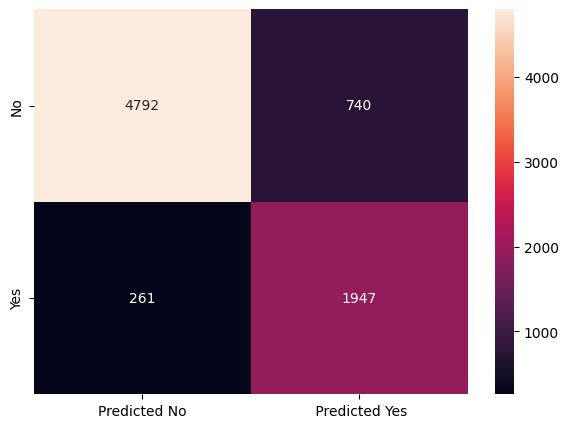

---------------------------------------------------------------------------------------------------------------


/var/folders/9f/5r7t61lx6ql101vthmbpb82r0000gn/T/ipykernel_2780/2506085620.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  feature_probs = np.sum(np.log(self.calculate_probability(example[i], self.feature_probabilities[c]['mean'][i], self.feature_probabilities[c]['std'][i])) for i in range(len(example)))
/var/folders/9f/5r7t61lx6ql101vthmbpb82r0000gn/T/ipykernel_2780/2506085620.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  feature_probs = np.sum(np.log(self.calculate_probability(example[i], self.feature_probabilities[c]['mean'][i], self.feature_probabilities[c]['std'][i])) for i in range(len(example)))


Model: <__main__.NaiveBayes object at 0x150d6c1d0>
Accuracy: 87.07
Recall: 0.8817934782608695
Precision: 0.7245999255675475
F1-Score: 0.7955056179775281
Training Score:0.8722749922142635
Testing Score:0.870671834625323
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.948     0.866     0.905      5532
           1      0.725     0.882     0.796      2208

    accuracy                          0.871      7740
   macro avg      0.836     0.874     0.850      7740
weighted avg      0.885     0.871     0.874      7740



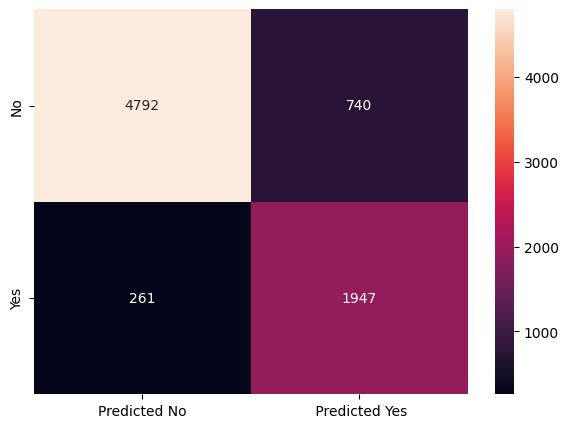

---------------------------------------------------------------------------------------------------------------


In [138]:
result_df = modelling(x_train_smote, x_test_pca, y_train_smote, y_test)


In [139]:
result_df

,Recall,Precision,F1_Score,Accuracy,Training_Score,Testing_Score
GaussianNB,0.881793,0.7246,0.795506,0.870672,0.872275,0.870672
CustomNaiveBayes,0.881793,0.7246,0.795506,0.870672,0.872275,0.870672


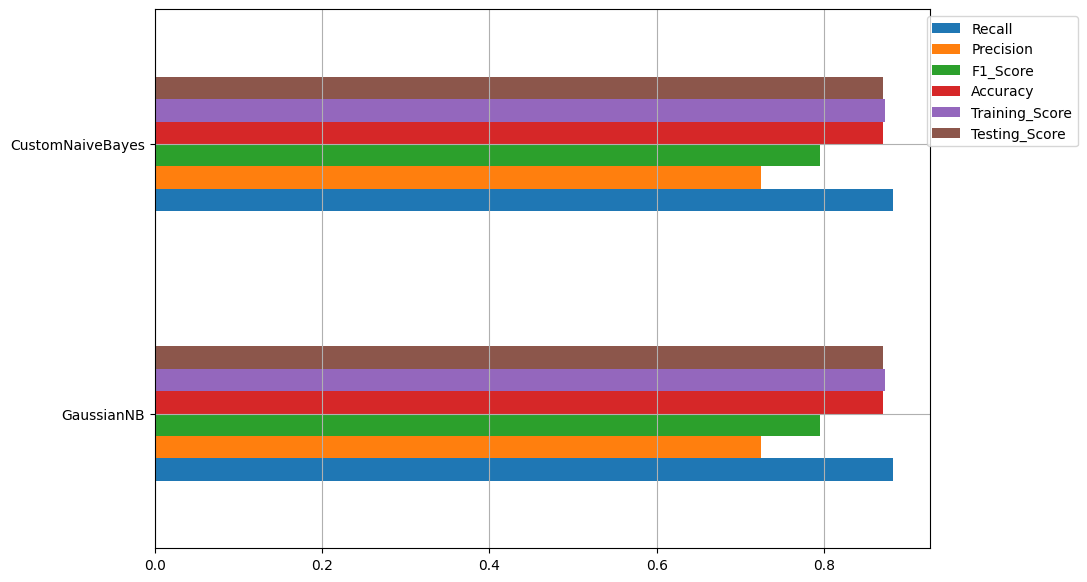

In [140]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2, 1))
plt.show()